In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(4682)

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Kfold cv
from sklearn.model_selection import KFold

# Random forest
from sklearn.ensemble import RandomForestClassifier

# Importing xgboost and shap
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import fbeta_score

# To plot results
import seaborn as sns

# POP_FAILURES

# Importing data

In [2]:
data = np.genfromtxt('data/pop/pop_failures.dat',delimiter='',skip_header = 1)

df = pd.read_csv ("data/pop/pop_failures.dat", sep=',', header=0)
columns = [s for s in (df.columns[0].split(' ')) if s]
df = pd.DataFrame(data, columns=columns)
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1.0,1.0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0.0
1,1.0,2.0,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1.0
2,1.0,3.0,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1.0
3,1.0,4.0,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1.0
4,1.0,5.0,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1.0


# Splitting data

In [3]:
# split data into train and test sets
seed = 7
test_size = 0.33
X = StandardScaler().fit_transform(df.drop('outcome', axis=1))
y = df['outcome'].values
#X_train, X_test, y_train, y_test = train_test_split(X, df.outcome, test_size=test_size, random_state=seed)

Using 432 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Train Index:  [  1   3   4   5   7   8  12  13  14  16  17  19  20  21  23  24  25  26
  27  28  29  31  32  34  35  36  37  38  40  41  42  43  44  45  47  48
  49  50  51  52  53  54  56  57  58  59  60  61  62  64  65  66  67  69
  71  74  80  81  83  85  87  88  91  92  94  95  96  97  98  99 100 102
 103 105 106 107 108 109 110 111 112 113 114 115 116 118 119 120 121 122
 123 124 125 126 127 128 129 130 133 134 135 136 138 139 141 142 143 144
 145 146 147 150 151 152 154 155 156 157 159 160 161 162 163 164 165 166
 168 169 170 171 172 174 175 178 179 181 182 183 184 186 187 188 189 190
 191 193 194 197 198 199 200 201 202 203 204 205 206 207 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 230 231 232
 233 236 237 238 239 240 241 242 243 244 246 247 248 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 269 270 273 274 275 276
 278 279 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 299 300 301 302 303 304 305 306 308 

  0%|          | 0/108 [00:00<?, ?it/s]

Using 432 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Train Index:  [  0   1   2   4   6   8   9  10  11  12  13  14  15  18  20  21  22  27
  28  30  32  33  34  35  36  38  39  40  41  43  44  46  47  49  50  51
  52  53  54  55  58  59  61  62  63  64  65  67  68  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  95  96  97  98  99 100 101 102 103 104 105 106 107 109 111 112 115
 117 119 120 121 122 123 125 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 156 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 173 174 176 177 178
 179 180 183 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 205 206 207 208 209 212 213 214 215 216 217 219 221 223 224
 226 227 229 230 232 233 234 235 236 237 239 240 241 242 243 245 246 249
 250 251 252 253 254 256 257 258 259 260 261 262 263 264 266 267 268 269
 270 271 272 273 274 276 277 279 280 281 282 283 284 285 288 290 292 293
 294 295 296 297 298 300 301 302 303 

  0%|          | 0/108 [00:00<?, ?it/s]

Using 432 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  37  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  60  61  62  63  64  65  66  68  69  70  71  72  73  75  76
  77  78  79  80  82  84  85  86  87  88  89  90  91  93  94  95  98  99
 100 101 102 104 105 106 107 108 110 112 113 114 115 116 117 118 120 121
 124 126 127 128 130 131 132 133 134 135 136 137 138 140 142 148 149 151
 153 154 155 156 157 158 159 160 161 162 164 166 167 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 184 185 186 187 189 190 191 192 195
 196 197 200 201 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 220 221 222 224 225 226 228 229 230 231 232 233 234 235 236 238
 240 241 242 243 244 245 247 248 249 250 251 252 254 255 256 258 259 260
 263 264 265 267 268 269 270 271 272 273 275 276 277 278 279 280 282 283
 285 286 287 288 289 291 292 295 297 

  0%|          | 0/108 [00:00<?, ?it/s]

Using 432 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Train Index:  [  0   1   2   3   5   6   7   9  10  11  13  15  16  17  18  19  20  21
  22  23  24  25  26  29  30  31  33  34  36  37  38  39  42  43  45  46
  48  49  50  52  53  54  55  56  57  58  59  60  63  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  86  87  88  89
  90  91  92  93  94  96  97  99 101 102 103 104 105 106 108 109 110 111
 113 114 116 117 118 119 121 122 123 124 125 126 129 130 131 132 134 137
 139 140 141 143 144 145 146 147 148 149 150 152 153 154 155 157 158 160
 161 163 165 166 167 168 169 172 173 174 175 176 177 180 181 182 183 184
 185 187 188 189 190 191 192 193 194 195 196 198 199 201 202 203 204 205
 207 208 209 210 211 212 214 216 217 218 219 220 222 223 225 227 228 229
 231 234 235 236 237 238 239 241 243 244 245 246 247 248 249 250 251 252
 253 255 257 259 261 262 263 264 265 266 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 284 286 287 289 290 291 293 294 295 296 297 298
 299 301 302 303 304 305 306 307 308 

  0%|          | 0/108 [00:00<?, ?it/s]

Using 432 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Train Index:  [  0   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18  19
  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40
  41  42  44  45  46  47  48  51  55  56  57  59  60  61  62  63  64  65
  66  67  68  69  70  72  73  74  75  76  77  78  79  81  82  83  84  85
  86  89  90  92  93  94  95  96  97  98 100 101 103 104 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 122 123 124 125 126 127 128 129
 131 132 133 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 162 163 164 165 167 168 170 171
 172 173 175 176 177 178 179 180 181 182 183 184 185 186 188 192 193 194
 195 196 197 198 199 200 202 203 204 206 208 209 210 211 213 215 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 237 238
 239 240 242 244 245 246 247 248 249 250 253 254 255 256 257 258 260 261
 262 265 266 267 268 271 272 274 275 277 278 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 296 

  0%|          | 0/108 [00:00<?, ?it/s]

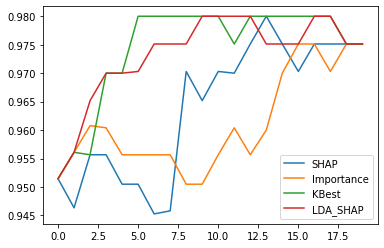

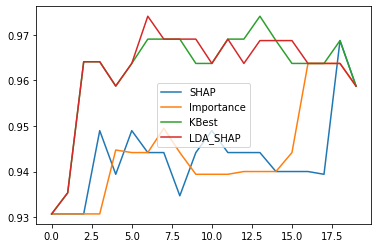

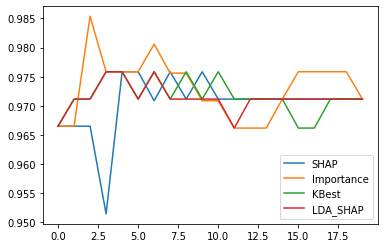

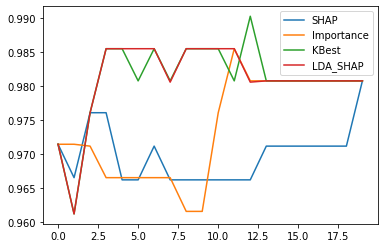

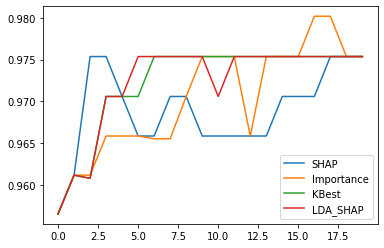

In [4]:
results = []

cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    
    model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    
    # explain the model's predictions using SHAP
    # (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
    explainer = shap.TreeExplainer(model)

    shap_values = explainer.shap_values(X)

    features = df.columns[df.columns!='outcome']
    #df[features]

    # visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
    #shap.force_plot(explainer.expected_value[0], shap_values[0][0], df[features].iloc[0,:], feature_names=features)

    #shap.force_plot(explainer.expected_value[0], shap_values[0], df[features])

    #shap.summary_plot(shap_values[0], df[features])

    # shap.summary_plot(shap_values, df[features], plot_type="bar")

    mean_shap_values = np.mean(np.abs(shap_values[0]), axis=0)
    shap_df = pd.DataFrame(mean_shap_values, index=df[features].columns, columns=["SHAP"])
    shap_df.sort_values(by="SHAP", inplace=True, ascending=False)
    # shap_df.plot(kind="bar")
    
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)

    indices = np.argsort(importances)[::-1]

    fi_df = pd.DataFrame(dict(zip(features[indices], importances[indices])), index=['Importance'])
    fi_df = fi_df.T
    # fi_df.head()
    # fi_df.plot(kind="bar")
    
    test = SelectKBest(score_func=f_classif, k=X_train.shape[1])
    fit = test.fit(X_train, y_train)
    # summarize scores
    set_printoptions(precision=3)
    # print(fit.scores_)

    kbest_dict = dict(zip(df.drop('outcome', axis=1).columns, fit.scores_))
    kbest_df = pd.DataFrame(kbest_dict, index=['KBest']).transpose()
    kbest_df.sort_values(by='KBest', ascending=False, inplace=True)
    # kbest_df.plot(kind="bar")
    
    # Transforming X from numpy to pandas to recover features
    X_train_df = pd.DataFrame(X_train, columns=df.drop(["outcome"], axis=1).columns)
    X_test_df = pd.DataFrame(X_test, columns=df.drop(["outcome"], axis=1).columns)

    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    lda.fit(X_train_df.values, y_train)
    y_pred = lda.predict(X_test_df)
    # use Kernel SHAP to explain test set predictions
    explainer = shap.KernelExplainer(lda.predict_proba, X_train_df, link="logit")
    shap_values = explainer.shap_values(X_test, nsamples=100)
    
    # plot the SHAP values for the Setosa output of the first instance
    # shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_df.iloc[0,:], link="logit")

    lda_shap_df = pd.DataFrame(np.mean(np.abs(shap_values[0]), axis=0), index=X_train_df.columns, columns=["LDA_SHAP"])
    lda_shap_df.sort_values(by="LDA_SHAP", ascending=False, inplace=True)
    # lda_shap_df.head()
    # lda_shap_df.plot(kind="bar")
    
    fs_df = pd.DataFrame(list(zip(shap_df.index, fi_df.index, kbest_df.index, lda_shap_df.index)), columns=["SHAP", "Importance", "KBest", "LDA_SHAP"])
    fs_df.head()
    # Initializing dataframe for results
    LDA_scores = pd.DataFrame(index=range(fs_df.shape[0]), columns=fs_df.columns)
    # Filling in LDA scores
    for num_features in range(fs_df.shape[0]):
        fs_df.iloc[:num_features+1]
        for method in fs_df.columns:
            selected_features = fs_df.iloc[:num_features+1][method]
            lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
            y_pred = lda.fit(X_train_df[selected_features].values, y_train).predict(X_test_df[selected_features])
            LDA_scores.loc[num_features, method] = fbeta_score(y_test, y_pred, beta=1)
    
    results.append(LDA_scores)
    LDA_scores.plot()

Text(0.5, 1.0, 'POP Failures Database')

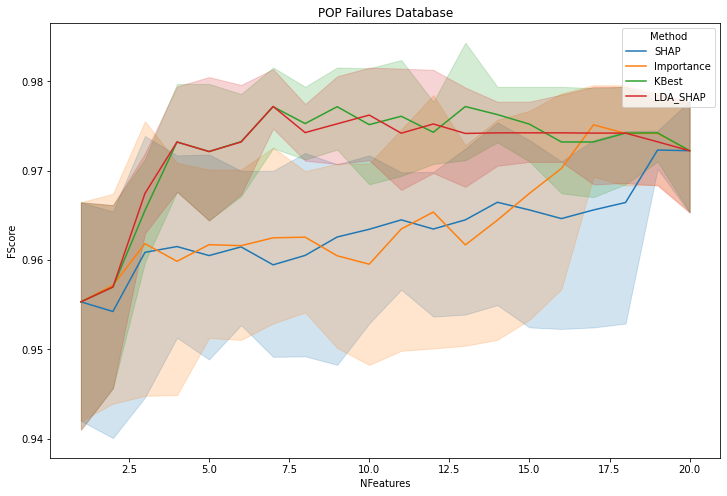

In [10]:
columns = results[0].columns
CV_LDA_scores = pd.DataFrame(columns=["FScore", "NFeatures", "Method", "Fold"])

for fold, lda_result in enumerate(results):
    for col in columns:
        test_df = pd.DataFrame({"FScore" : lda_result[col],
                                "NFeatures": np.arange(len(lda_result))+1,
                                "Method": [col]*len(lda_result),
                                "Fold": [fold]*len(lda_result)})
        CV_LDA_scores = pd.concat([CV_LDA_scores, test_df])
        
# Asserting data types
CV_LDA_scores.FScore = CV_LDA_scores.FScore.astype(float)
CV_LDA_scores.NFeatures = CV_LDA_scores.NFeatures.astype(int)
# Plot
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=CV_LDA_scores, x="NFeatures", y="FScore", hue="Method").set_title('POP Failures Database')

<AxesSubplot:>

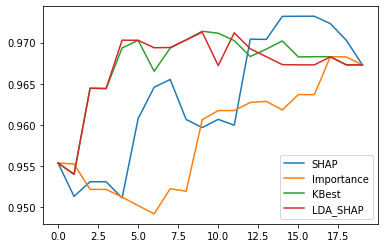

In [28]:
CV_LDA_scores.plot()

In [9]:
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1.0,1.0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0.0
1,1.0,2.0,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1.0
2,1.0,3.0,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1.0
3,1.0,4.0,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1.0
4,1.0,5.0,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1.0


# Training Random Forest Model

In [4]:

model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.18%


# SHAP

<AxesSubplot:>

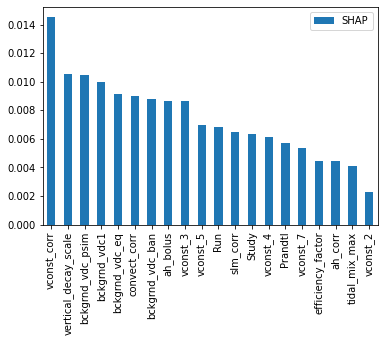

In [6]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X)

features = df.columns[df.columns!='outcome']
#df[features]

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.force_plot(explainer.expected_value[0], shap_values[0][0], df[features].iloc[0,:], feature_names=features)

#shap.force_plot(explainer.expected_value[0], shap_values[0], df[features])

#shap.summary_plot(shap_values[0], df[features])

# shap.summary_plot(shap_values, df[features], plot_type="bar")

mean_shap_values = np.mean(np.abs(shap_values[0]), axis=0)
shap_df = pd.DataFrame(mean_shap_values, index=df[features].columns, columns=["SHAP"])
shap_df.sort_values(by="SHAP", inplace=True, ascending=False)
shap_df.plot(kind="bar")

# Random Forest Feature Importance

<AxesSubplot:>

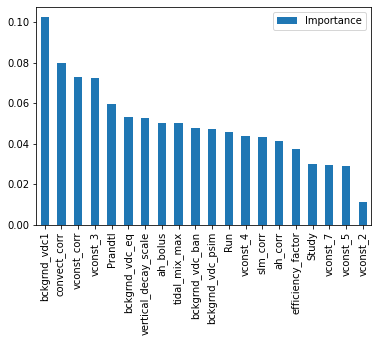

In [8]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

fi_df = pd.DataFrame(dict(zip(features[indices], importances[indices])), index=['Importance'])
fi_df = fi_df.T
#fi_df.head()

fi_df.plot(kind="bar")

# Seleção por K-Best features

<AxesSubplot:>

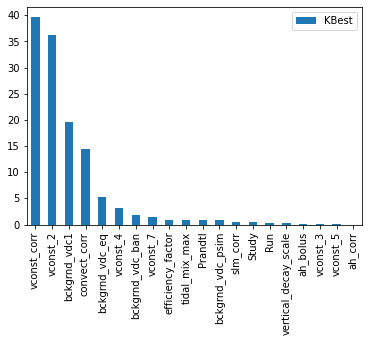

In [10]:
test = SelectKBest(score_func=f_classif, k=X_train.shape[1])
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=3)
#print(fit.scores_)

kbest_dict = dict(zip(df.drop('outcome', axis=1).columns, fit.scores_))
kbest_df = pd.DataFrame(kbest_dict, index=['KBest']).transpose()
kbest_df.sort_values(by='KBest', ascending=False, inplace=True)
kbest_df.plot(kind="bar")

# Calculating SHAP for LDA

In [14]:
# Transforming X from numpy to pandas to recover features
X_train_df = pd.DataFrame(X_train, columns=df.drop(["outcome"], axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(["outcome"], axis=1).columns)

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_train_df.values, y_train)
y_pred = lda.predict(X_test_df)

In [15]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(lda.predict_proba, X_train_df, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

Using 361 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/179 [00:00<?, ?it/s]

<AxesSubplot:>

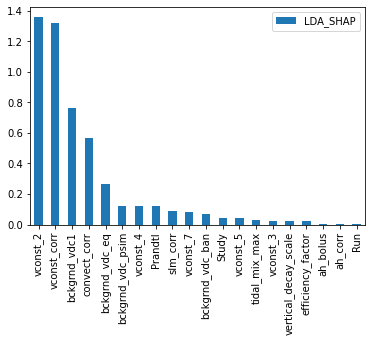

In [16]:
# plot the SHAP values for the Setosa output of the first instance
# shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_df.iloc[0,:], link="logit")

lda_shap_df = pd.DataFrame(np.mean(np.abs(shap_values[0]), axis=0), index=X_train_df.columns, columns=["LDA_SHAP"])
lda_shap_df.sort_values(by="LDA_SHAP", ascending=False, inplace=True)
# lda_shap_df.head()
lda_shap_df.plot(kind="bar")

# Combining Feature Orders

In [17]:
fs_df = pd.DataFrame(list(zip(shap_df.index, fi_df.index, kbest_df.index, lda_shap_df.index)), columns=["SHAP", "Importance", "KBest", "LDA_SHAP"])
fs_df.head()

,SHAP,Importance,KBest,LDA_SHAP
0,vconst_corr,bckgrnd_vdc1,vconst_corr,vconst_2
1,vertical_decay_scale,convect_corr,vconst_2,vconst_corr
2,bckgrnd_vdc_psim,vconst_corr,bckgrnd_vdc1,bckgrnd_vdc1
3,bckgrnd_vdc1,vconst_3,convect_corr,convect_corr
4,bckgrnd_vdc_eq,Prandtl,bckgrnd_vdc_eq,bckgrnd_vdc_eq


<AxesSubplot:>

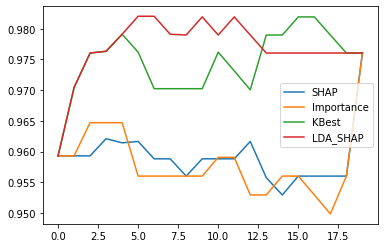

In [18]:
# Initializing dataframe for results
LDA_scores = pd.DataFrame(index=range(fs_df.shape[0]), columns=fs_df.columns)
# Filling in LDA scores
for num_features in range(fs_df.shape[0]):
    fs_df.iloc[:num_features+1]
    for method in fs_df.columns:
        selected_features = fs_df.iloc[:num_features+1][method]
        lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
        y_pred = lda.fit(X_train_df[selected_features].values, y_train).predict(X_test_df[selected_features])
        LDA_scores.loc[num_features, method] = fbeta_score(y_test, y_pred, beta=1)
LDA_scores.plot()

___

- Verificar código
- Verificar se LDA é o suficiente
- Mexer agora no modelo que estou usando
- Bases conhecidas, com performance conhecida. Treinar um bom modelo de classificação e extrair os Shapley
- trabalhos fred 2020 e 2019 com outros classificadores pras bases conhecidas

___

- Testar para mais bases de dados
    - sonar
    - ILPD (poucas features)
    - ionosfera
    - mfit (fácil)
- Cross validation
- Influência do modelo nos Shapley Values
    - Mesmo modelo, diferentes performances
    - Modelos diferentes

___

Métodos de feature importance (single variable):
- Feature score
- Correlação
- AUC por variavel

Resultado do model com as top X variaveis

LDA para cada variável-> salvar resultados 